# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [76]:
# Enter your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
# A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

pd.set_option('display.max_columns', None)
data = pd.read_csv('mushrooms.csv')
print(data.head())

In [78]:
# B. Store the feature and target variable. (2 marks)

features = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]

y = data['class']

In [80]:
# C. Convert all categorical variables into dummy variables (1 mark)

X = pd.get_dummies(features, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

In [82]:
# D. Partition the data into training and test sets (70/30) (1 mark)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

In [84]:
# E. Fit the training data to a classification tree. (3 marks)

#2: Create a new object (this one only takes entropy or Gini index)
# Paramates: Criterian ("entropy or gini"), splitter (leave blank), max_depth (leave blank), 
      # min_samples_split (default min. is 2), min_samples_leaf (default is 1)

dt = DecisionTreeClassifier(criterion='entropy', max_depth = 6)

#3: Fit the model
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


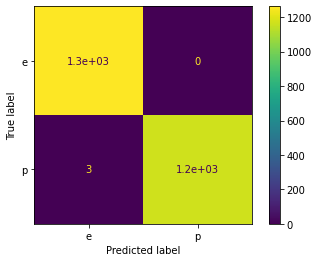

In [85]:
# Enter your code here

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

# Plot matrix 
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()


3. Print the accuracy on the training partition?  (2 marks)


In [86]:
# Enter your code here - how do I do this?

yTrain_pred = dt.predict(X_train)

print('Accuracy =', metrics.accuracy_score(yTrain_pred, y_train))

Accuracy = 1.0


4. Print the accuracy on the test partition? (2 marks)


In [87]:
# Enter your code here

print('Accuracy =', metrics.accuracy_score(y_pred, y_test))

Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


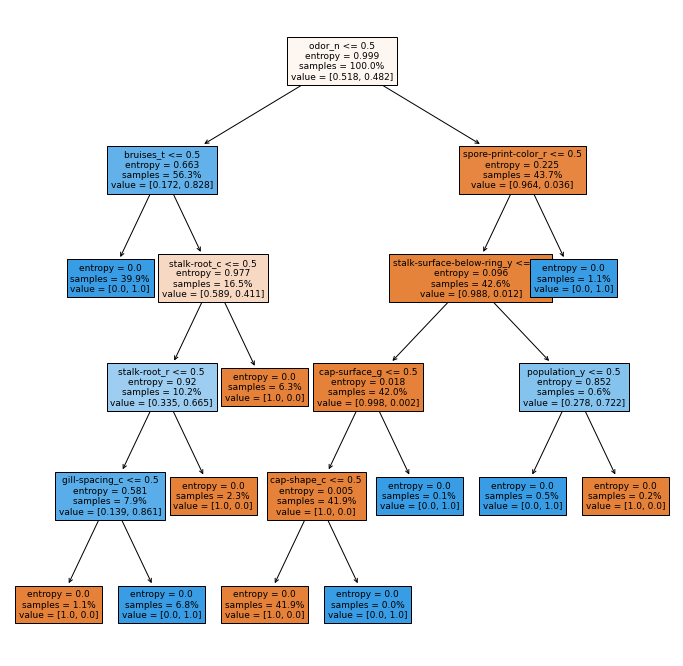

In [88]:
# Enter your code here

plt.figure(2,figsize=(12,12))
fn = X.columns
# cn = y.unique()
MushroomTree = tree.plot_tree(dt, feature_names=fn, filled=True, proportion=True, fontsize=9)
plt.savefig('MushroomDT.jpeg', quality=500)
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [89]:
# Enter your code here

print('Feature Importance:', dt.feature_importances_)

# imp = pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
# print('Feature Importance:', imp)

Feature Importance: [0.         0.00222887 0.         0.         0.         0.
 0.         0.00527896 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21269464 0.         0.
 0.         0.         0.         0.5278987  0.         0.
 0.         0.         0.         0.04570394 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.06737296
 0.         0.04806723 0.         0.         0.         0.
 0.         0.         0.         0.02812073 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [90]:
# Enter your code here

# 1. create a mushroom dataframe with requested features
# 2. #append to X original dataframe
# 3. convert ENTIRE frame into dummy_variables again
# 4. create a prediction with the fitted model using dt.predict(entireFrame[[index_value]])

sample_shroom = {'cap-shape':["x"],
                 'cap-surface':["s"],
                 'cap-color':["n"],
                 'bruises':["t"],
                 'odor':["y"],
                 'gill-attachment':["f"],
                 'gill-spacing':["c"],
                 'gill-size':["n"],
                 'gill-color':["k"],
                 'stalk-shape':["e"],
                 'stalk-root':["e"],
                 'stalk-surface-above-ring':["s"],
                 'stalk-surface-below-ring':["s"],
                 'stalk-color-above-ring':["w"],
                 'stalk-color-below-ring':["w"],
                 'veil-type':["p"],
                 'veil-color':["w"],
                 'ring-number':["o"],
                 'ring-type':["p"],
                 'spore-print-color':["r"],
                 'population':["s"],
                 'habitat':["u"]}

one_row = pd.DataFrame(sample_shroom)

New = pd.concat([features, one_row])

XDummy = pd.get_dummies(New)

print(dt.predict(XDummy.iloc[[-1]]))

['p']
